# 1. Descripción del Análisis Exploratorio de Datos (EDA)

El hundimiento del RMS Titanic en 1912 es uno de los acontecimientos más trágicos y conocidos de la historia marítima. Esta catástrofe se cobró la vida de muchas personas y sus circunstancias han suscitado un interés constante por comprender los factores que contribuyeron a la supervivencia de los pasajeros. El conjunto de datos del Titanic proporciona una valiosa ventana a este trágico suceso, ya que ofrece información detallada sobre los pasajeros que iban a bordo y sobre si sobrevivieron o no.

El análisis exploratorio de datos (AED) es una herramienta fundamental para explorar y comprender conjuntos de datos, ya que nos permite descubrir patrones, tendencias y relaciones significativas. En este estudio, nos embarcamos en un AED del conjunto de datos del Titanic con el objetivo de arrojar luz sobre los factores que pueden haber influido en la supervivencia de los pasajeros.

Este conjunto de datos contiene diversas variables que describen las características de los pasajeros, como su sexo, edad, clase socioeconómica, puerto de embarque, etcétera. Algunas de las preguntas a las que intentaremos dar respuesta son ¿Existe una relación entre la clase de un pasajero y su probabilidad de supervivencia? ¿Desempeñaron la edad o el sexo un papel significativo en la probabilidad de supervivencia? ¿Existen diferencias significativas en las tasas de supervivencia entre los pasajeros embarcados en distintos puertos?

Mediante el análisis de estas y otras variables, pretendemos extraer datos significativos que nos ayuden a comprender mejor los acontecimientos que rodearon el hundimiento del Titanic. Este análisis no sólo nos permite honrar la memoria de los que iban a bordo, sino que también nos proporciona valiosas lecciones sobre la resistencia humana y los factores que pueden influir en los resultados en situaciones extremas.

En las siguientes secciones exploraremos en detalle las distintas variables del conjunto de datos, crearemos visualizaciones para identificar patrones y relaciones, y aplicaremos técnicas estadísticas para extraer conclusiones significativas. A través de este proceso, esperamos obtener una perspectiva más clara y completa de los acontecimientos que rodearon al Titanic y de las vidas de quienes iban a bordo.

![Texto alternativo](../images/titanic_image.png)


# 2. ¿Cuál es la pregunta que vamos a responder?

¿Qué factores están relacionados con que los pasajeros tuvieran alta/baja probilidad de sobrevivir?

# 3. Idea General de nuestro DataSet

En primer lugar importaremos las librerías necesarias:

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick 
import warnings
warnings.filterwarnings("ignore")

Después tendremos que generar nuestro **DataFrame** a partir del archivo **CSV**, y ejecutaremos el **head(10)** para hacernos una primera idea de la apariencia de nuestros datos. Al realizar el **'pd.read_csv()'** utilizaremos la variable **'index_col=0'** para establecer el **PassengerId** como el índice de nuestro dataset. 

In [7]:
# Cargar el DataFrame de los datos del Titanic desde la URL
titanic = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv', index_col=0)

# Mostrar las primeras 10 filas del DataFrame
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


Nuestro DataFrame cuenta con unas dimensiones de **891 filas** x **11 columnas**. Las **891 filas** son el número de pasajeros con los que contamos (entradas), esta es una cantidad suficiente para hacer un análisis de datos exhaustivo. Las **11 columnas** representan las variables o caracterísitcas que tenemos de cada pasajero (features).

In [8]:
# Obtener las dimensiones del DataFrame
titanic.shape

(891, 11)

Aquí podemos observar cuales son nuestras **columnas** en una lista.

In [9]:
# Obtener los nombres de las columnas del DataFrame
titanic.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

El siguiente método nos permite sacar **información general** de nuestro dataset, esto es muy útil y podemos ver como hay una serie de información que utilizaremos más adelante en este análisis.

In [10]:
# Obtener un resumen del DataFrame
titanic.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Pasemos a definir nuestros datos, tanto el **significado**, como la **categorización** o los **tipos de datos**.

# 4. Definiendo los Datos

En este apartado nos encargaremos de definir los datos tanto el **significado**, como la **categorización** o los **tipos de datos**. Esto es realmente útil para tener una idea general del comportamiento de nuestros datos, y además nos servirá para crear distintos tipos de gráficos dependiendo de su categorización. 

## 4.1 Descripción de las Variables

En primer lugar veremos el significado de cada variable:
- **PassengerId**: ID único de cada pasajero
- **Survived**: Pasajero superviviente (1) o muerto (0)
- **Pclass**: Clase del pasajero
- **Name**: Nombre
- **Sex**: Género del Pasajero
- **Age**: Edad
- **SibSp**: Número de parejas o hermanos
- **Parch**: Número de padres e hijos
- **Ticket**: Número de Ticket
- **Fare**: Dinero Gastado en el Ticket
- **Cabin**: Categoría de la Cabina
- **Embarked**: Puerto desde el que embarcó cada pasajero (C = Cherbourg, Q = Queenstown, S = Southampton)

## 4.2 Clasificación de Variables

Después veremos la clasificación de estas variables, es decir si son numéricas o categóricas, y dentro de esto si son discretos o continuos, o nominales, binarios u ordinales respectivamente:
- Variables Categóricas
    - Variables Nominales: **Sex, Embarked, Cabin, Name and Ticket.**
    - Variables Binarias: **Survived.**
    - Variables Ordinales: **Pclass, SibSp and Parch.**
- Variables Numéricas
    - Variables Discretas: **Age.**
    - Variables Continuas: **Fare.**

## 4.3 Tipos de Datos

En este apartado podemos ver los tipos de datos de las variables de cada columna:

In [11]:
# Obtener los tipos de datos de cada columna del DataFrame
titanic.dtypes

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

- float64(2): Fare and Age
- int64(5): Pclass, Sibsp, Parch, PassengerId and Survived
- object(5): Cabin, Embarked, Ticket, Name and Sex

# 5 Datos Faltantes

En el análisis exploratorio de datos, uno de los aspectos fundamentales que se deben abordar es la presencia de valores faltantes en el conjunto de datos. Los valores faltantes pueden surgir por diversas razones, como errores en la recolección de datos, problemas de almacenamiento, o simplemente porque ciertas observaciones no están disponibles o no son aplicables. La importancia de identificar, analizar y tratar los valores faltantes radica en su potencial impacto sobre la calidad y la fiabilidad de los resultados del análisis.

Los valores faltantes pueden distorsionar las conclusiones derivadas de los datos si no se manejan adecuadamente. Pueden llevar a sesgos en los modelos predictivos, afectar las estadísticas descriptivas y, en general, comprometer la integridad del análisis. Por estas razones, es crucial dedicar un apartado específico en el EDA para abordar los valores faltantes, permitiendo una comprensión clara de su magnitud, distribución y posibles causas.

Este apartado no solo se centrará en la detección de los valores faltantes, sino también en la aplicación de técnicas para manejarlos de manera efectiva, ya sea mediante imputación, eliminación o el uso de métodos más avanzados. La correcta gestión de los valores faltantes es un paso esencial para garantizar que el análisis posterior sea preciso y representativo de la realidad, evitando así decisiones basadas en información incompleta o sesgada.

En primer lugar veremos que columnas tienen valores **nulos** en nuestro dataset. Como podemos observar tenemos **3 columnas** con al menos un valor nulo.

In [12]:
titanic.columns[titanic.isnull().any()]

Index(['Age', 'Cabin', 'Embarked'], dtype='object')

A continuación, tenemos que visualizar cuantos valores nulos existen por por columna, en nuestro caso tenemos **177 nulos en la columna Age**, **687 nulos en la columna Cabin** y **2 nulos en la columna Embarked**.

In [13]:
titanic.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

Teniendo en cuenta esto veremos como podemos tratar estos valores nulos.

### 5.1.1 Age

Como vimos anteriormente esta variable es la que indica la **edad de los pasajeros** y tiene un **19,86%** de valores faltantes. Por ello he tomado la decisión de **imputar** estos valores computando números aleatorios, una **desviación estándar** separado de la **media** por arriba y por abajo, y con el tamaño de los **nulos** que tenemos. 

Esto nos permite que se repartan esta cantidad de valores faltantes de una manera más equitativa, ya que los valores estan entorno a la media. Considero que esta aplicación le da un punto más realista a nuestros datos, ya que si por ejemplo imputasemos la media se vería bastante irreal a la hora de hacer un histograma.

In [14]:
# Calcula la media de la columna "Age" del DataFrame titanic
mean = titanic["Age"].mean()

# Calcula la desviación estándar de la columna "Age" del DataFrame titanic
std = titanic["Age"].std()

# Cuenta el número de valores nulos en la columna "Age"
is_null = titanic["Age"].isnull().sum()

# Genera una serie de edades aleatorias dentro del rango (mean - std, mean + std)
# La cantidad de valores generados es igual al número de valores nulos en "Age"
rand_age = np.random.randint(mean - std, mean + std, size = is_null)

# Crea una copia de la columna "Age" para trabajar sobre ella
age_slice = titanic["Age"].copy()

# Reemplaza los valores nulos en la copia de "Age" con las edades aleatorias generadas
age_slice[np.isnan(age_slice)] = rand_age

# Asigna la copia modificada de "Age" de vuelta al DataFrame titanic
titanic["Age"] = age_slice

# Convierte los valores de la columna "Age" a enteros
titanic["Age"] = titanic["Age"].astype(int)

# Verifica y cuenta el número de valores nulos restantes en la columna "Age"
titanic['Age'].isnull().sum()


0

Como podemos ver ya no tenemos valores nulos en esta columna.

### 5.1.2 Cabin

Esta variable indica la **categoría de la cabina**, y tiene un **77,1%** de valores faltantes. Por ello he tomado la decisión de **eliminar** esta columna completa. Ya que aunque podría llegar a contener alguna información relevante que nos pueda ayudar a resolver nuestra pregunta inicial, la cantidad de nulos es tan masiva que resultaría impreciso imputar ningún valor.

In [15]:
# Elimina la columna 'Cabin' del DataFrame titanic
titanic = titanic.drop('Cabin', axis=1)

# Muestra las columnas restantes del DataFrame titanic
titanic.columns


Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked'],
      dtype='object')

### 5.1.3 Embarked

La variable que trataremos en este apartado se trata de **donde embarcó el pasajero**, esta solo cuenta con **2** valores faltantes. Lo que he decidido hacer con esta variable es completarla con el valor **más común**, es decir con la **moda**.

In [16]:
# Calcula el valor más frecuente (moda) de la columna 'Embarked'
mode_embarked = titanic['Embarked'].mode()[0]

# Rellena los valores nulos en la columna 'Embarked' con la moda calculada
titanic['Embarked'] = titanic['Embarked'].fillna(mode_embarked)

# Verifica y cuenta el número de valores nulos restantes en la columna 'Embarked'
titanic['Embarked'].isnull().sum()

0

# 6. Comprensión de los Datos

En el análisis exploratorio de datos (EDA), una comprensión exhaustiva de las variables presentes en el conjunto de datos es fundamental para orientar adecuadamente los análisis posteriores. Este apartado está diseñado para ofrecer una descripción detallada de cada una de las variables en nuestro DataFrame, diferenciando claramente entre variables categóricas y variables numéricas.

Las variables categóricas representan datos que pueden clasificarse en un número finito de categorías o grupos. Ejemplos comunes incluyen variables como género, estado civil, o tipo de producto. Para cada variable categórica en nuestro DataFrame, proporcionaremos un esquema que ilustre el conteo de cada opción o categoría. Este esquema se presenta típicamente mediante gráficos de barras o diagramas de pastel, que son herramientas efectivas para visualizar distribuciones de frecuencia y comparar el tamaño de diferentes categorías de manera clara y directa.

Las variables numéricas, por otro lado, representan datos cuantitativos que pueden asumir un rango amplio de valores, como la edad, el salario, o la temperatura. Para estas variables, utilizaremos histogramas que permitan visualizar la distribución de los datos a lo largo de su rango de valores. Los histogramas son particularmente útiles para identificar patrones como la normalidad, la presencia de sesgos, y la existencia de outliers (valores atípicos), proporcionando una visión profunda sobre la dispersión y la concentración de los datos.

El uso de gráficos distintos para variables categóricas y numéricas se justifica por la naturaleza intrínseca de los datos que representan. Las variables categóricas, al estar compuestas de grupos discretos y finitos, se visualizan mejor con gráficos que destaquen el conteo de cada categoría, permitiendo comparaciones visuales fáciles y directas. En contraste, las variables numéricas, que pueden tomar una amplia gama de valores continuos, se representan mejor con histogramas que muestran la distribución y densidad de los datos, facilitando el análisis de su comportamiento y características estadíticas.

## 6.1 Variables Categóricas

### 6.1.1 Survived

Esta es nuestra variable objetivo, con el siguiente gráfico podremos ver la cantidad de supervivientes en comparación con los que no. Esto es una idea general de la variable, más adelante veremos comparaciones de esta variable con el resto. Recordemos que la pregunta que ibamos a resolver era, What factors are related to passengers having a higher/lower probability of survival?

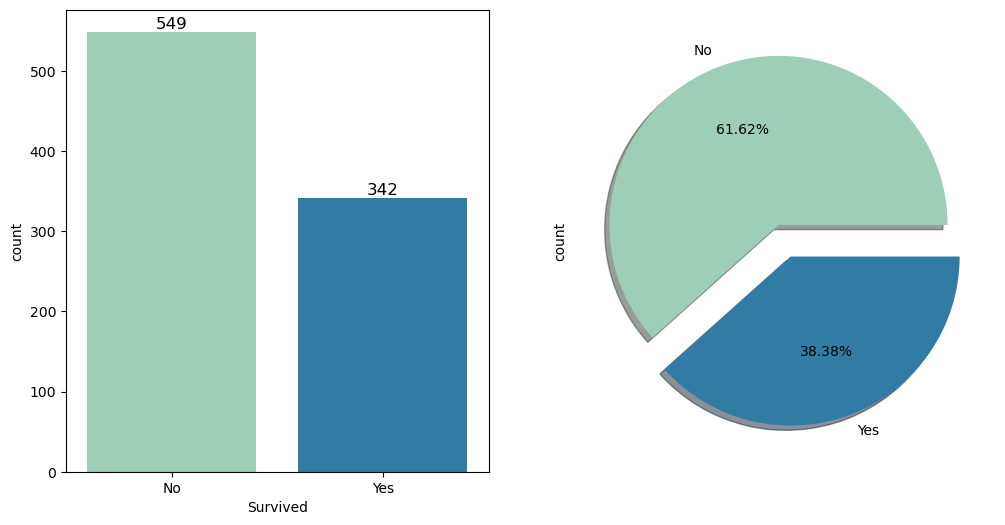

In [17]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'Survived' del DataFrame titanic
sns.countplot(x='Survived', data=titanic, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")
# Cambia las etiquetas del eje x a "No" y "Yes" para una mejor comprensión
ax1.set_xticklabels(["No", "Yes"])

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'Survived'
titanic['Survived'].value_counts().plot.pie(
    explode=[0.1, 0.1],             # Separa ligeramente ambas secciones del gráfico
    autopct='%1.2f%%',              # Muestra los porcentajes con dos decimales
    labels=["No", "Yes"],           # Etiquetas para las secciones del gráfico
    shadow=True,                    # Añade una sombra al gráfico
    colors=["#9FCEB8", "#327BA5"],  # Colores personalizados para las secciones
    ax=ax2                          # Especifica el eje (subplot) donde se dibujará el gráfico
)

# Muestra los gráficos
plt.show()

### 6.1.2 Sex

Esta es la variable que indica la cantidad de **hombres y mujeres** que habían en el Titanic. Como podemos observar existían más hombres que mujeres en el barco, pero esto no significa que sobrevivieran o no, eso lo veremos más adelante comparandolo con la variable **"Survived"**. En este análisis resolveremos la siguiente cuestión, ¿Sobrevivieron más hombres o más mujeres a este accidente?¿Existe alguna justificación en caso de que un sexo tuviera más fallecidos que el otro?

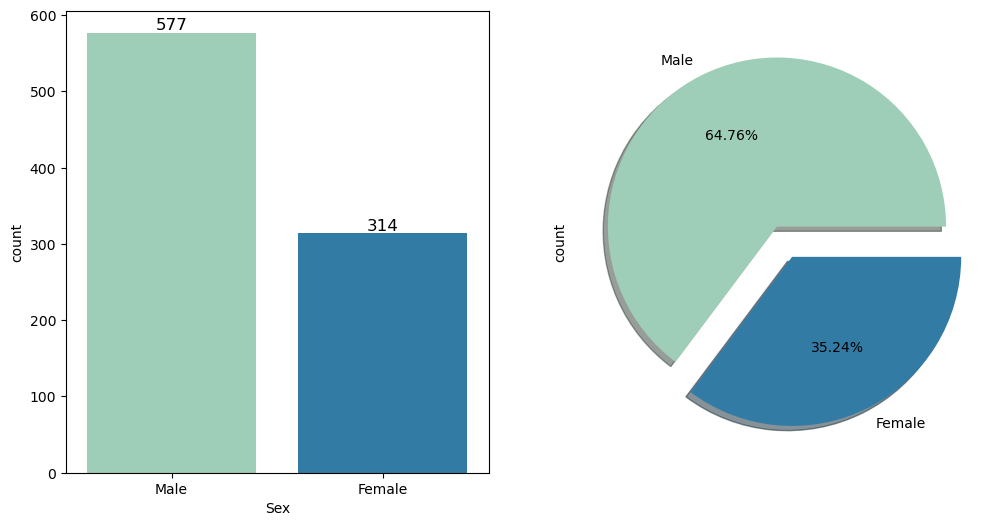

In [18]:
# Establece el tamaño de la figura del gráfico
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'Sex' del DataFrame titanic
sns.countplot(x='Sex', data=titanic, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")
# Cambia las etiquetas del eje x a "Male" y "Female" para una mejor comprensión
ax1.set_xticklabels(["Male", "Female"])

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'Sex'
titanic['Sex'].value_counts().plot.pie(
    explode=[0.1, 0.1],             # Separa ligeramente ambas secciones del gráfico
    autopct='%1.2f%%',              # Muestra los porcentajes con dos decimales
    labels=["Male", "Female"],      # Etiquetas para las secciones del gráfico
    shadow=True,                    # Añade una sombra al gráfico
    colors=["#9FCEB8", "#327BA5"],  # Colores personalizados para las secciones
    ax=ax2                          # Especifica el eje (subplot) donde se dibujará el gráfico
)

# Muestra los gráficos
plt.show()


### 6.1.3 Name - Title

En este caso lo que he decidido es tomar del nombre algo que nos pueda interesar. En este caso al separar el Mr., Mrs. ..., podemos separar a los pasajeros según su estatus social. De esta manera podemos relacionar el sobrevivir o no dependiendo del status social del pasajero. Entonces la pregunta que nos hariamos sería, ¿Influyo el status social en que sobreviviera o no el pasajero?

In [19]:
# Extrae la columna 'Name' del DataFrame titanic y la almacena en la variable 'name'
name = titanic["Name"]

# Crea una nueva columna 'Title' en el DataFrame titanic
# Extrae el título de cada nombre en la columna 'Name'
# Para cada nombre, divide la cadena por "," y toma la segunda parte, luego divide esa parte por "." y toma la primera parte
# Finalmente, elimina cualquier espacio en blanco alrededor del título extraído
titanic["Title"] = [i.split(".")[0].split(",")[-1].strip() for i in name]

# Muestra los primeros 10 valores de la nueva columna 'Title' para verificar los títulos extraídos
titanic["Title"].head(10)

# Cuenta y muestra la cantidad de ocurrencias de cada título en la columna 'Title'
titanic["Title"].value_counts()

# Finalmente eliminamos la columna Name que ya no necesitamos
titanic = titanic.drop('Name', axis=1)

Visto lo anterior podemos crear un countplot() para ver cuantos pasajeros había según su clase social. Esto nos ayudará posteriormente comparandolo con otras variables a determinar si es una característica relevante o no.

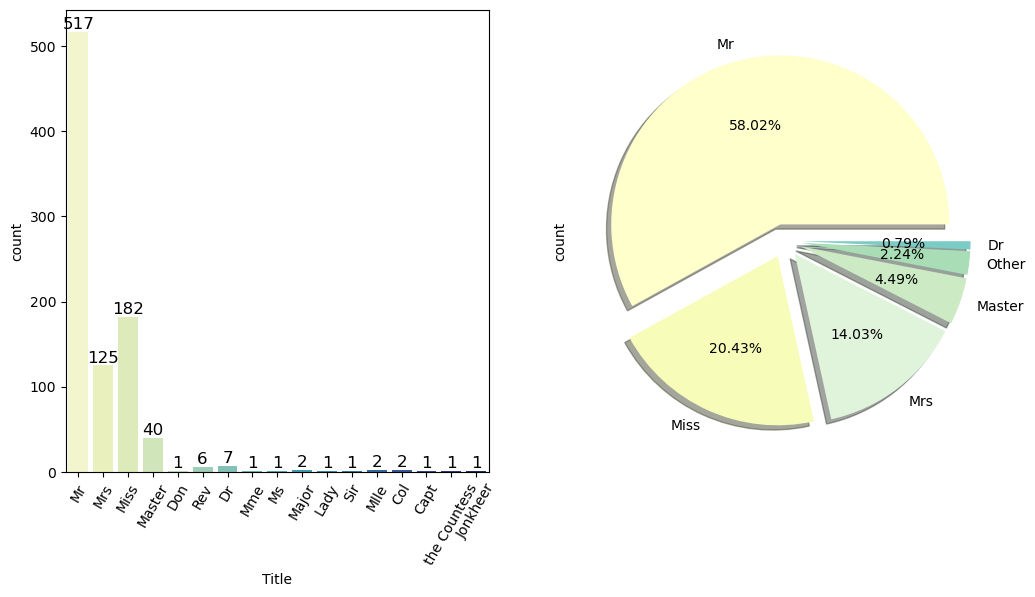

In [20]:
# Define un umbral para agrupar los títulos poco frecuentes
threshold = 6

# Crea una nueva columna 'Title_Grouped' en el DataFrame titanic
# Si la frecuencia de un título es mayor que el umbral, se mantiene el título original
# De lo contrario, se agrupa bajo el título 'Other'
titanic['Title_Grouped'] = titanic['Title'].apply(lambda x: x if titanic['Title'].value_counts()[x] > threshold else 'Other')

# Establece el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 6))

# Crea el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibuja un gráfico de conteo para la columna 'Title' del DataFrame titanic
sns.countplot(x='Title', data=titanic, palette='YlGnBu', ax=ax1)
# Añade etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")
# Rota las etiquetas del eje x para que sean más legibles
plt.xticks(rotation=60)

# Crea el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibuja un gráfico circular de los valores de la columna 'Title_Grouped'
titanic['Title_Grouped'].value_counts().plot.pie(
    explode=[0.1] * titanic['Title_Grouped'].nunique(),  # Separa todas las secciones del gráfico
    autopct='%1.2f%%',                                   # Muestra los porcentajes con dos decimales
    colors=['#FFFFCC', '#F7FCB9', '#E0F3DB', '#CCEBC5', '#A8DDB5', '#7BCCC4', '#4EB3D3', '#2B8CBE'],  # Colores personalizados para las secciones
    shadow=True,                                         # Añade una sombra al gráfico
    ax=ax2                                               # Especifica el eje (subplot) donde se dibujará el gráfico
)
# Muestra los gráficos
plt.show()

In [21]:
# Eliminamos Family_grouped para que después el modelo no nos de problemas
titanic = titanic.drop('Title_Grouped', axis=1)

### 6.1.4 Ticket

La variable 'Ticket' terminará por eliminarse, debido a que no le encuentro una utilidad real que pueda ser beneficiosa para el modelo

In [22]:
titanic["Ticket"].head(5)

PassengerId
1           A/5 21171
2            PC 17599
3    STON/O2. 3101282
4              113803
5              373450
Name: Ticket, dtype: object

In [23]:
titanic = titanic.drop('Ticket', axis=1)

### 6.1.5 Pclass

Esta variable como vimos anteriormente determina la clase en la que se encontraban los pasajeros. Siendo la clase 1 la de más rango y la 3 la de menor rango. Como podemos ver la clase 3 era las más frecuente en el Titanic, después la 1 y la 2. Hemos realizado una gráfica para tener una primera idea de la cantidad de pasajeros que hay por clase. Teniendo esto en mente, ¿Existe alguna relación entre la clase del pasajero y su superviviencia?

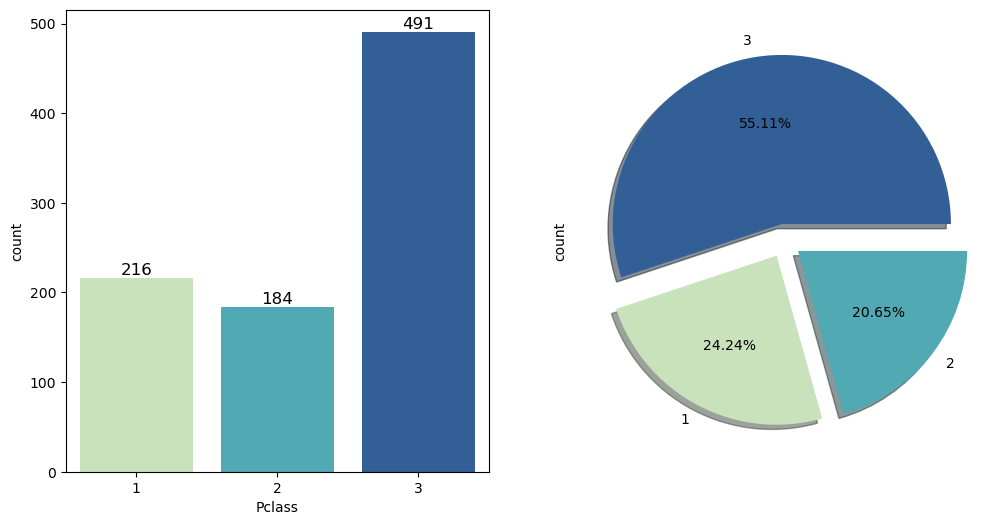

In [24]:
# Establecer el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 6))

# Crear el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibujar un gráfico de conteo para la columna 'Pclass' del DataFrame titanic
sns.countplot(x='Pclass', data=titanic, palette='YlGnBu', ax=ax1)
# Añadir etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crear el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibujar un gráfico circular de los valores de la columna 'Pclass'
titanic['Pclass'].value_counts().plot.pie(
    explode=[0.1, 0.1, 0.1],          # Separar ligeramente todas las secciones del gráfico
    autopct='%1.2f%%',                # Mostrar los porcentajes con dos decimales
    shadow=True,                      # Añadir una sombra al gráfico
    colors=["#335F97", "#C8E2BB", "#51A9B3"],  # Colores personalizados para las secciones
    ax=ax2                            # Especificar el eje (subplot) donde se dibujará el gráfico
)

# Mostrar los gráficos
plt.show()


### 6.1.6 SibSp & Parch

Las características SibSp y Pach, como vimos anteriormente, son el número de Hermanos/Esposos y el número de Padres/Hijos respectivamente. Esta variable considero que puede ser muy relevante, ya qué ¿Influyó en la superviviencia de los pasajeros que tuvieran o no Hermanos/Esposos/Padres/Hijos en el barco?

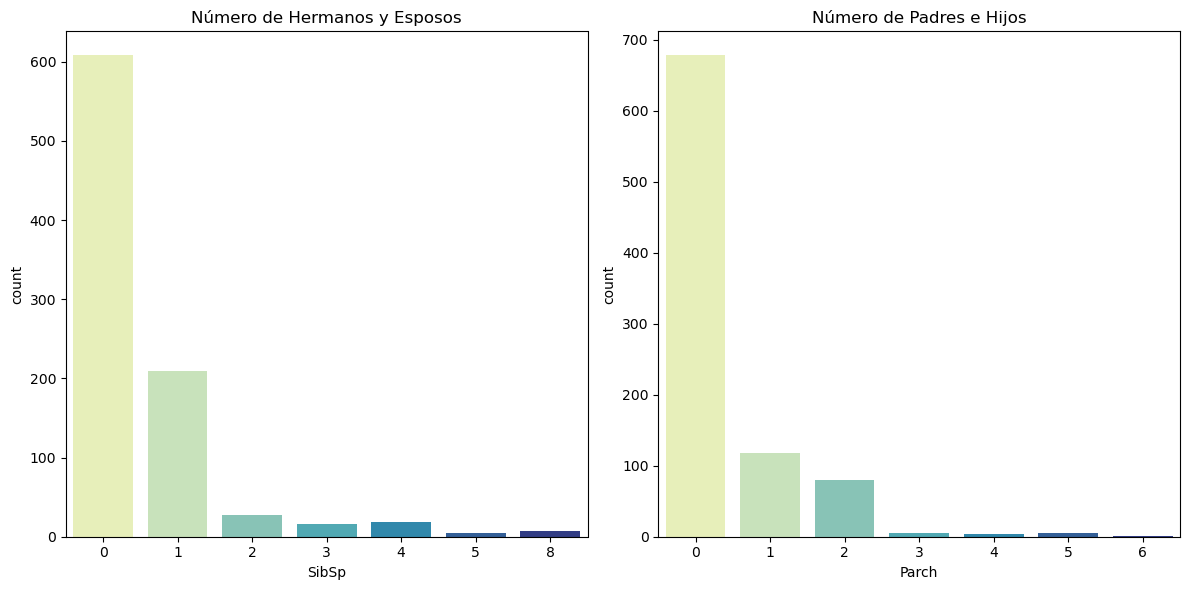

In [25]:
# Crear una figura y dos subplots (uno para 'SibSp' y otro para 'Parch')
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Dibujar el gráfico de conteo para 'SibSp' en el primer subplot
sns.countplot(ax=axes[0], data=titanic, x='SibSp', palette='YlGnBu')
# Establecer el título del primer subplot
axes[0].set_title('Número de Hermanos y Esposos')

# Dibujar el gráfico de conteo para 'Parch' en el segundo subplot
sns.countplot(ax=axes[1], data=titanic, x='Parch', palette='YlGnBu')
# Establecer el título del segundo subplot
axes[1].set_title('Número de Padres e Hijos')

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


La idea para que esta característica sea más manejable es unir 'SibSp' y 'Parch' en una misma variable llamada 'Family', de esta manera podemos ver cuantos familiares tenía en el barco cada pasajero, incluyendolo a él. ¿Es exactamente lo mismo Hermanos/Esposos que Padres/Hijos? Evidentemente no, pero por la misma razón que no es lo mismo Hermanos o Esposos, considero que es bastante lógico unirlo en una única característica haciéndonos entonces la siguiente pregunta ¿Influyó en la supervivencia de los pasajeors que contaran con familiares en el barco?

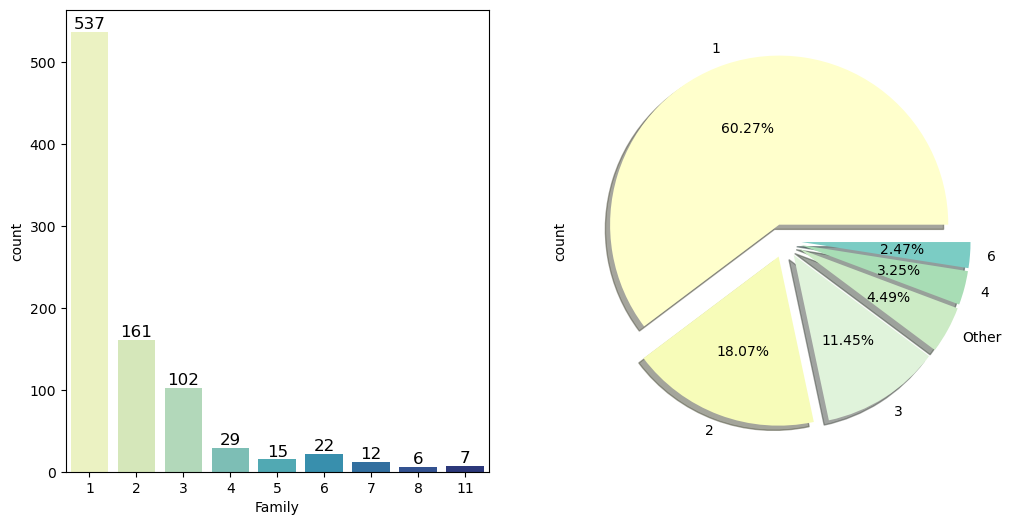

In [26]:
# Calcular el tamaño de la familia para cada pasajero
titanic["Family"] = titanic["SibSp"] + titanic["Parch"] + 1

# Definir un umbral para agrupar tamaños de familia poco frecuentes
threshold = 20

# Crear una nueva columna 'Family_grouped' para agrupar los tamaños de familia
titanic['Family_grouped'] = titanic['Family'].apply(lambda x: x if titanic['Family'].value_counts()[x] > threshold else 'Other')

# Configurar el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 6))

# Crear el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibujar un gráfico de conteo para el tamaño de la familia
sns.countplot(x='Family', data=titanic, palette='YlGnBu', ax=ax1)
# Añadir etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crear el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibujar un gráfico circular para el tamaño de la familia agrupada
titanic['Family_grouped'].value_counts().plot.pie(
    explode=[0.1] * titanic['Family_grouped'].nunique(),  # Separar todas las secciones del gráfico
    autopct='%1.2f%%',  # Mostrar los porcentajes con dos decimales
    shadow=True,  # Añadir una sombra al gráfico
    colors=['#FFFFCC', '#F7FCB9', '#E0F3DB', '#CCEBC5', '#A8DDB5', '#7BCCC4', '#4EB3D3', '#2B8CBE', '#08589E', '#0868AC', '#2B8CBE'],  # Colores personalizados para las secciones
    ax=ax2  # Especificar el eje (subplot) donde se dibujará el gráfico
)

# Mostrar los gráficos
plt.show()

Como podemos observar esta variable define cual es era el tamaño de las familias que habían en el barco. Esto puede resultar útil, pero igualmente mantendremos las características 'SibSp' y 'Parch'.

In [27]:
# Eliminamos Family_grouped para que después el modelo no nos de problemas
titanic = titanic.drop('Family_grouped', axis=1)

### 6.1.7 Embarked

Como vimos anteriormente esta variable se refiere al lugar de embarcación de cada pasajero. Podemos ver que el más frecuente es el de Southampton, el cual usamos también para imputar los 2 valores nulos que había. 

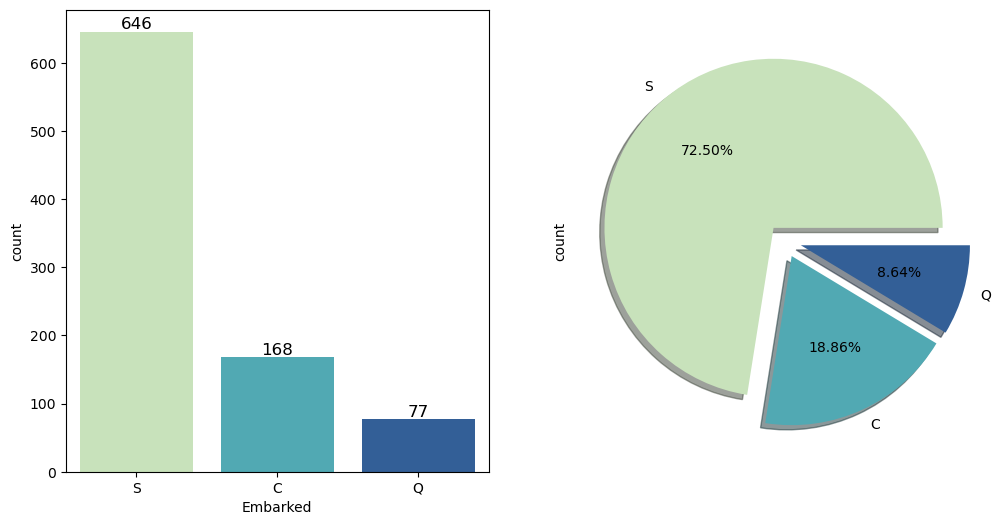

In [28]:
# Configurar el tamaño de la figura para los gráficos
plt.figure(figsize=(12, 6))

# Crear el primer subplot (un gráfico de barras)
ax1 = plt.subplot(1, 2, 1)
# Dibujar un gráfico de conteo para el puerto de embarque ('Embarked')
sns.countplot(x='Embarked', data=titanic, palette='YlGnBu', ax=ax1)
# Añadir etiquetas a las barras del gráfico de conteo
ax1.bar_label(ax1.containers[0], fontsize=12, color="black")

# Crear el segundo subplot (un gráfico circular)
ax2 = plt.subplot(1, 2, 2)
# Dibujar un gráfico circular de los valores del puerto de embarque ('Embarked')
titanic['Embarked'].value_counts().plot.pie(
    explode=[0.1, 0.1, 0.1],  # Separar ligeramente todas las secciones del gráfico
    autopct='%1.2f%%',        # Mostrar los porcentajes con dos decimales
    shadow=True,              # Añadir una sombra al gráfico
    colors=["#C8E2BB",  "#51A9B3", "#335F97"],  # Colores personalizados para las secciones
    ax=ax2                    # Especificar el eje (subplot) donde se dibujará el gráfico
)

# Mostrar los gráficos
plt.show()


## 6.2 Variables Numéricas

### 6.2.1 Fare

Esta variable, como vimos anteriormente, indica el precio del boleto pagado por el pasajero. El gráfico muestra la distribución de las tarifas pagadas, lo que puede ser útil para comprender la variabilidad en los precios de los boletos. La pregunta que nos podemos hacer es ¿Significa esto qué los pasajeros que pagaron un ticket más alto tuvieron más posibilidades de sobrevivir?

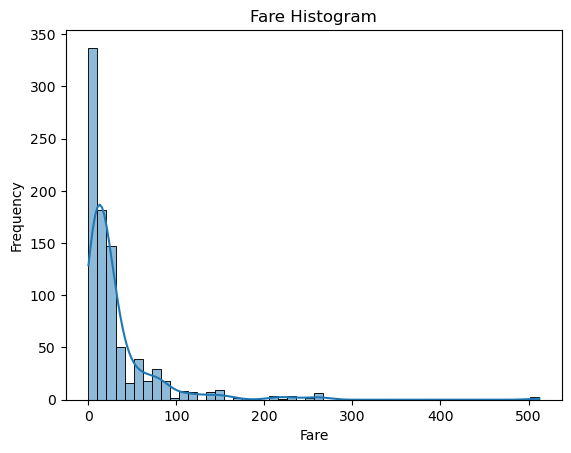

In [29]:
# Crear el histograma de la tarifa ('Fare')
g2 = sns.histplot(titanic['Fare'], kde=True, bins=50)

# Establecer la etiqueta del eje y
g2.set_ylabel("Frequency")

# Establecer el título del histograma
g2.set_title('Fare Histogram')

# Mostrar el histograma
plt.show()

### 6.2.2 Age

Como ya podremos intuir esta variable representa la edad de cada pasajero. El gráfico muestra la distribución de edades, lo que nos permite entender la demografía de los pasajeros, incluidos niños, adultos y personas mayores. La pregunta que nos podemos hacer es ¿Influyó la edad de los pasajeros a que sobrevivieran o no a esta tragedia?

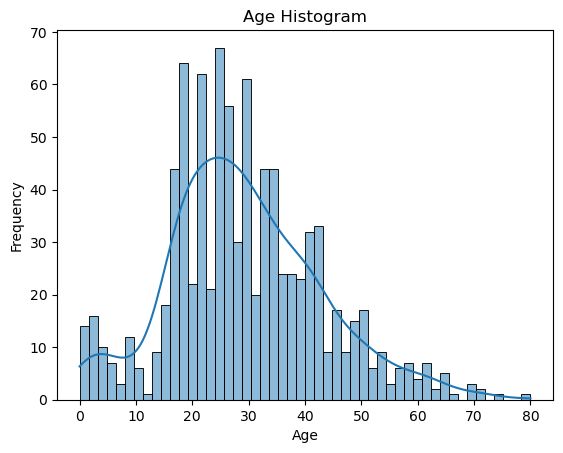

In [30]:
# Crear el histograma de la edad ('Age')
g2 = sns.histplot(titanic['Age'], kde=True, bins=50)

# Establecer la etiqueta del eje y
g2.set_ylabel("Frequency")

# Establecer el título del histograma
g2.set_title('Age Histogram')

# Mostrar el histograma
plt.show()


## 6.3 Comparación de cada variable

### 6.3.2 Correlación entre las variables y la variable objetivo (Survived)

#### Family

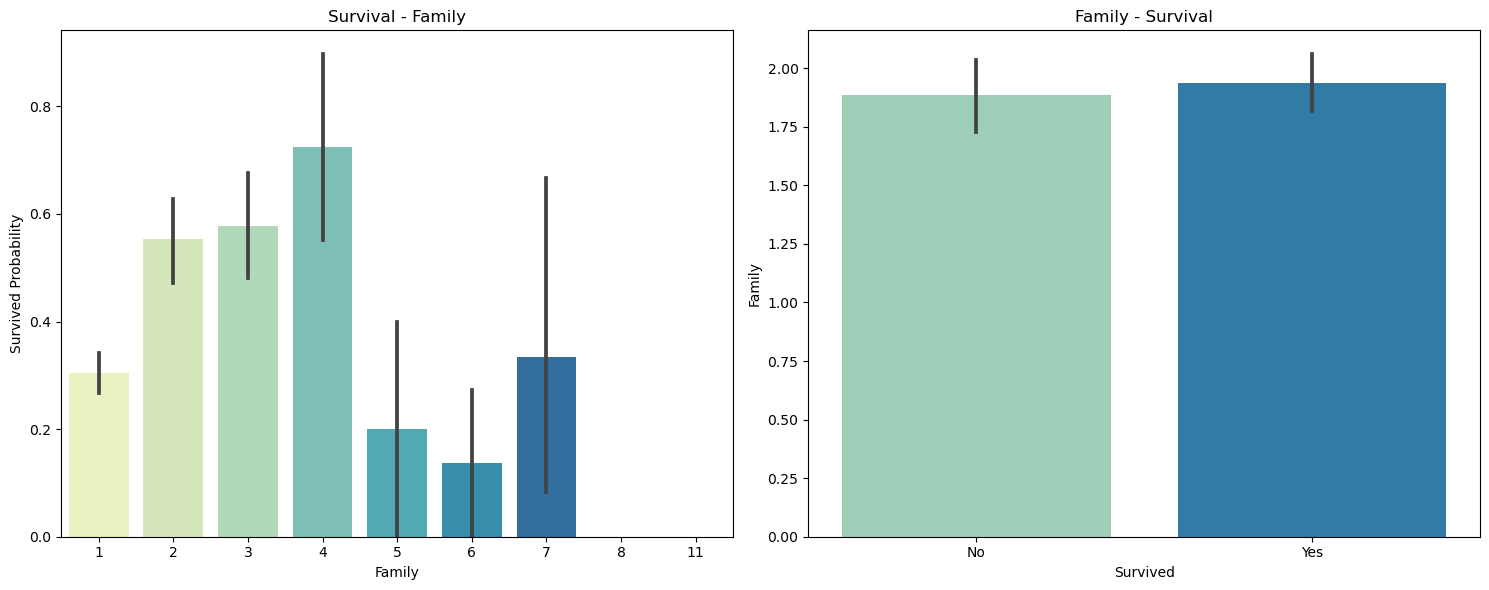

In [31]:
# g = sns.barplot(x="Family", y="Survived", data=titanic, palette='YlGnBu')
# g.set_ylabel("Survived Probability")
# g.set_title("Survival - Family")
# plt.show()
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primer gráfico: Barplot de Pclass vs Survived
sns.barplot(x="Family", y="Survived", data=titanic, palette='YlGnBu', ax=axes[0])
axes[0].set_ylabel("Survived Probability")
axes[0].set_title("Survival - Family")

# Segundo gráfico: Boxplot de Sex vs Age con hue por Pclass
sns.barplot(x="Survived", y="Family", data=titanic, palette='YlGnBu', ax=axes[1])
axes[1].set_title("Family - Survival")
axes[1].set_xticklabels(["No", "Yes"])

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()




#### Pclass

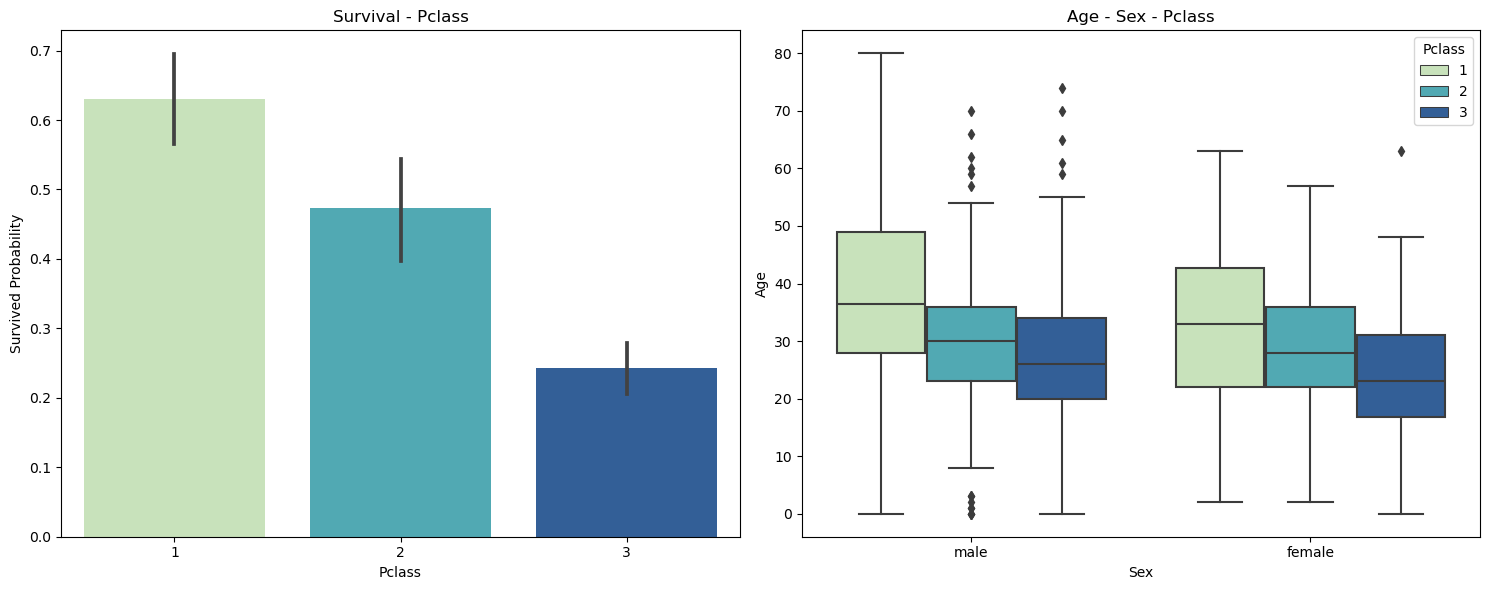

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Primer gráfico: Barplot de Pclass vs Survived
sns.barplot(x="Pclass", y="Survived", data=titanic, palette='YlGnBu', ax=axes[0])
axes[0].set_ylabel("Survived Probability")
axes[0].set_title("Survival - Pclass")

# Segundo gráfico: Boxplot de Sex vs Age con hue por Pclass
sns.boxplot(x="Sex", y="Age", hue="Pclass", data=titanic, palette='YlGnBu', ax=axes[1])
axes[1].set_title("Age - Sex - Pclass")

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()

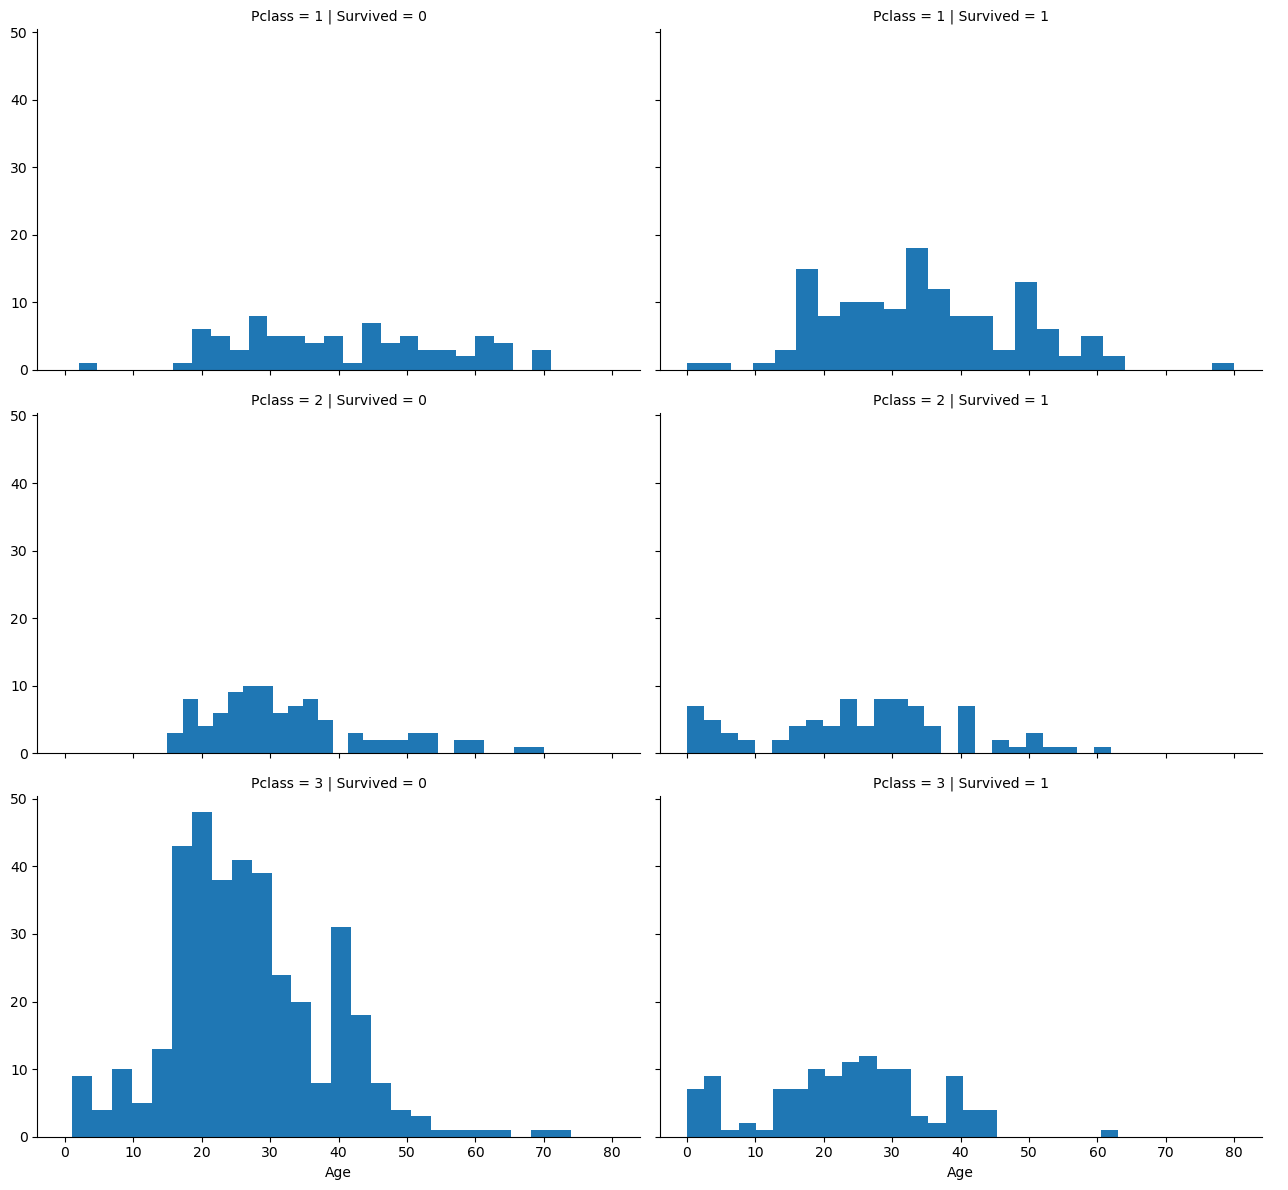

In [33]:
# Crear un FacetGrid con las columnas "Survived" y las filas "Pclass"
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", height=4, aspect=1.6)

# Mapear un histograma de la edad ("Age") en cada celda del grid
g.map(plt.hist, "Age", bins=25)

# Añadir una leyenda al FacetGrid
g.add_legend()

# Mostrar el gráfico
plt.show()


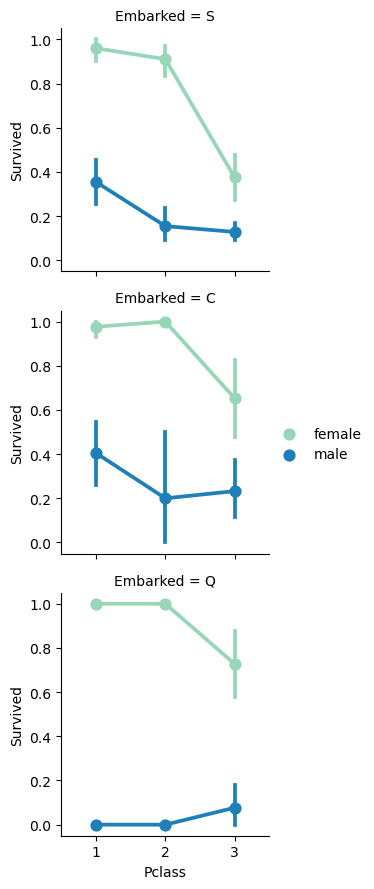

In [34]:
# Definir el orden de las categorías
pclass_order = sorted(titanic['Pclass'].unique())
sex_order = sorted(titanic['Sex'].unique())
# Crear el FacetGrid
g = sns.FacetGrid(titanic, row="Embarked")
g.map(sns.pointplot, "Pclass", "Survived", "Sex", palette='YlGnBu', order=pclass_order, hue_order=sex_order)
g.add_legend()
# Mostrar el gráfico
plt.show()

#### Title

In [35]:
titanic['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

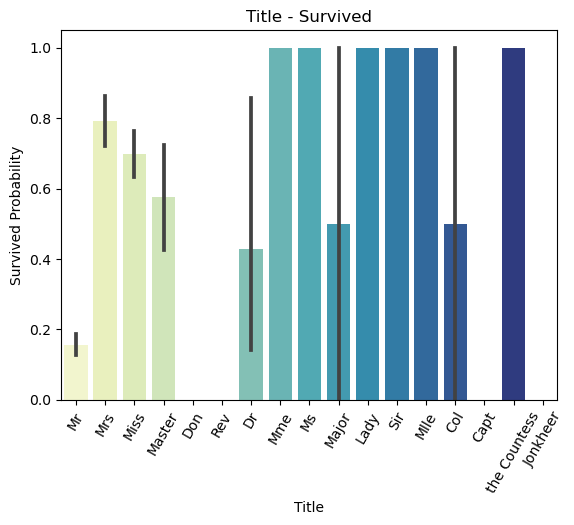

In [36]:
g = sns.barplot(x = "Title", y = "Survived", data = titanic, palette='YlGnBu')
g.set_ylabel("Survived Probability")
g.set_title("Title - Survived")
plt.xticks(rotation = 60)
warnings.filterwarnings("ignore", message=".*The figure layout has changed to tight*")
plt.show()

### Embarqued - Survived

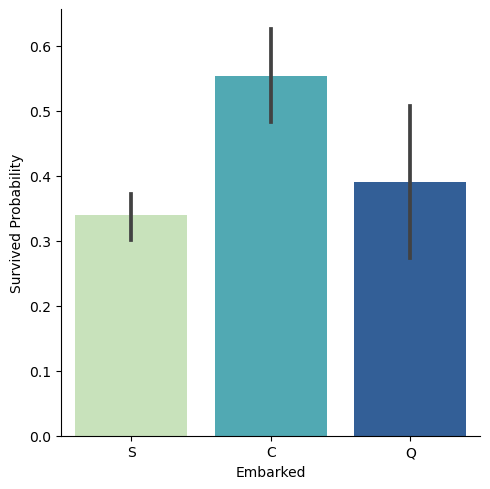

In [37]:
g = sns.catplot(x = "Embarked", y = "Survived", data = titanic, kind = "bar", palette='YlGnBu')
g.set_ylabels("Survived Probability")
warnings.filterwarnings("ignore", message=".*The figure layout has changed to tight*")
plt.show()

### Sex - Survived

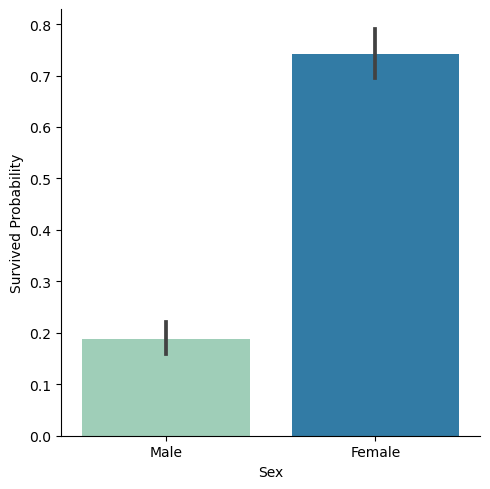

In [38]:
g = sns.catplot(x = "Sex", y = "Survived", data = titanic, kind = "bar", palette='YlGnBu')
g.set_ylabels("Survived Probability")
g.set_xticklabels(["Male", "Female"])
warnings.filterwarnings("ignore", message=".*The figure layout has changed to tight*")
plt.show()

### Age - Survived

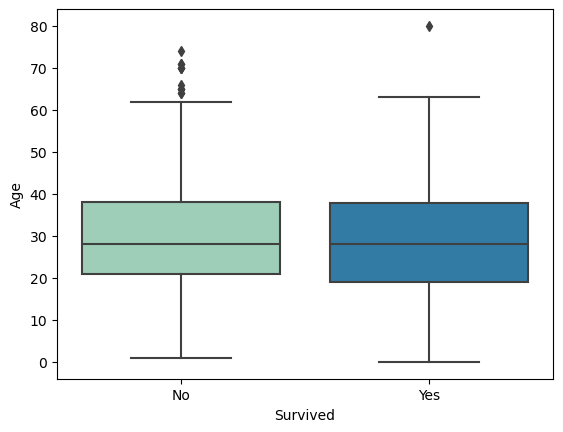

In [39]:
g = sns.boxplot(x="Survived", y="Age", data=titanic, palette='YlGnBu')
g.set_xticklabels(["No", "Yes"])
plt.show()

### Fare - Survived

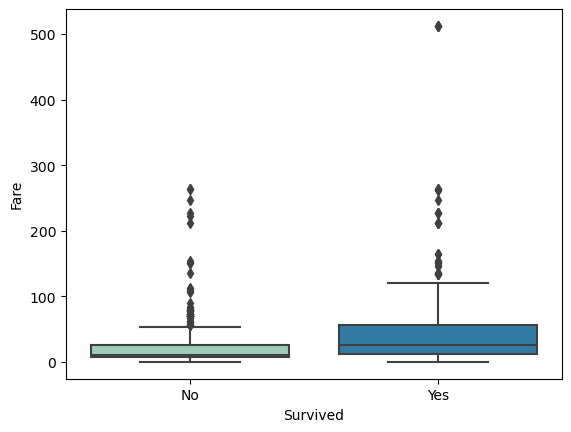

In [40]:
g = sns.boxplot(x="Survived", y="Fare", data=titanic, palette='YlGnBu')
g.set_xticklabels(["No", "Yes"])
plt.show()

### 6.3.1 Correlation between all variables

In [41]:
list1 = ["Family", "Age", "Fare", "Survived", "Pclass"]
titanic[list1].corr()

,Family,Age,Fare,Survived,Pclass
Family,1.000000,-0.242947,0.217138,0.016639,0.065997
Age,-0.242947,1.000000,0.081760,-0.054599,-0.315356
Fare,0.217138,0.081760,1.000000,0.257307,-0.549500
Survived,0.016639,-0.054599,0.257307,1.000000,-0.338481
Pclass,0.065997,-0.315356,-0.549500,-0.338481,1.000000


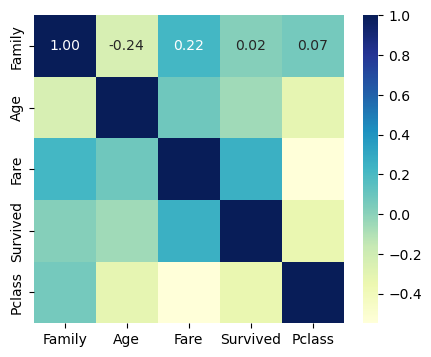

In [42]:
plt.subplots(figsize=(5, 4))
list1 = ["Family", "Age", "Fare", "Survived", "Pclass"]
sns.heatmap(titanic[list1].corr(), cmap = "YlGnBu", annot=True, fmt=".2f")
plt.show()

# 7. Feature Engineering

Una vez que hemos comprendido en profundidad las variables presentes en nuestro DataFrame, el siguiente paso es el Feature Engineering. Este apartado es crucial para preparar y transformar los datos de manera que puedan ser utilizados eficazmente en modelos predictivos y otros análisis avanzados. El Feature Engineering implica la creación, modificación y selección de características (features) que pueden mejorar el rendimiento del modelo y extraer información más significativa de los datos.

El primer aspecto del Feature Engineering es la transformación de variables. Aquí, aplicamos técnicas que mejoran la distribución de los datos o facilitan su interpretación por los modelos. Entre las transformaciones comunes se incluyen la normalización o estandarización de variables numéricas, la conversión de variables categóricas a variables dummy (codificación one-hot), y la aplicación de transformaciones logarítmicas para variables que siguen una distribución sesgada.

Finalmente, la selección de características implica identificar y mantener las variables que más contribuyen al rendimiento del modelo, mientras se eliminan aquellas que son redundantes o irrelevantes. Este proceso puede involucrar técnicas estadísticas como la selección hacia atrás o hacia adelante, así como métodos automatizados como el análisis de importancia de características proporcionado por modelos de árboles de decisión.

El uso de diversas técnicas de Feature Engineering se justifica por su capacidad para mejorar la representatividad y la calidad de los datos que alimentan los modelos. Al crear nuevas variables, podemos capturar relaciones y patrones que no son evidentes en las variables originales. La transformación de variables asegura que los datos se ajusten mejor a las suposiciones de los modelos estadísticos, lo que puede resultar en un mejor desempeño y una mayor capacidad predictiva. Por último, la selección cuidadosa de características ayuda a simplificar el modelo, reducir el sobreajuste y mejorar la interpretabilidad de los resultados.

## 7.1 Codificación de Variables Categóricas

Primero, identificamos las variables categóricas y las codificamos adecuadamente.

- Variables nominales: Sex, Embarked, Title_Grouped
- Variables ordinales: No hay variables ordinales evidentes en este conjunto de datos, pero si tuvieramos por ejemplo una columna de Clase de Ticket con valores como Low, Medium, High, esa sería una variable ordinal.

Usaremos One-Hot Encoding para las variables nominales y Label Encoding para las ordinales.

In [43]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# Codificación de la variable 'Sex'
label_encoder_sex = LabelEncoder()
titanic['Sex'] = label_encoder_sex.fit_transform(titanic['Sex'])

# Codificación One-Hot de las variables nominales
titanic = pd.get_dummies(titanic, columns=['Embarked', 'Title'], drop_first=True)

## 7.2 Transformaciones de distribución

Transformaremos las variables que no siguen una distribución normal. Aplicaremos la transformación logarítmica a la variable **'Fare'**.

In [44]:
# Transformación logarítmica de la variable 'Fare'
titanic['Fare'] = np.log1p(titanic['Fare'])

## 7.3 Discretización de variables numéricas

Pasamos variables numéricas a un rango categórico de tal manera que pueda ser mejor interpretado por el modelo de machine learning

Discretizamos la variable Age en categorías. Luego la codificaremos

In [45]:
# Discretización de la variable 'Age'
titanic['Age_Bins'] = pd.cut(titanic['Age'], bins=[0, 12, 18, 35, 60, 100], labels=['Child', 'Teenager', 'Young Adult', 'Adult', 'Senior'])
titanic = pd.get_dummies(titanic, columns=['Age_Bins'], drop_first=True)

## 7.4 Manejo de outliers

Identificamos y manejamos los outliers en las variables numéricas. Para este ejemplo, eliminaremos los outliers en **Fare** y **Age** que estén fuera del rango intercuartil (IQR).

In [46]:
# Eliminación de outliers utilizando el rango intercuartil (IQR)
Q1 = titanic[['Fare', 'Age']].quantile(0.25)
Q3 = titanic[['Fare', 'Age']].quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
titanic = titanic[~((titanic[['Fare', 'Age']] < (Q1 - 1.5 * IQR)) |(titanic[['Fare', 'Age']] > (Q3 + 1.5 * IQR))).any(axis=1)]

## 7.5 Escalamiento

Este paso consiste en poner todos los datos en una escala para que puedan ser comparables entre ellos. Estas son las técnicas que podemos utilizar:
- Estandarización.
- Escalamiento por mínimo y máximo.
- Escalamiento por rango intercuantil.

In [47]:
from sklearn.preprocessing import StandardScaler

# Escalamiento de variables numéricas
scaler = StandardScaler()
titanic[['Age', 'Fare']] = scaler.fit_transform(titanic[['Age', 'Fare']])

## 7.6 Selección de características

Se trata de seleccionar las características que son relevantes para que nuestro modelo funcione correctamente y eliminar aquellas que no son relevantes o que supondrían un mal funcionamiento del modelo. Estas son las técnicas más usadas:
- Métodos de filtrado.
- Métodos wrapper.
- Métodos embebidos.

In [48]:
# Selección de características basadas en la correlación con la variable objetivo
correlation = titanic.select_dtypes(include=[np.number]).corr()['Survived'].abs().sort_values(ascending=False)
relevant_features = correlation[correlation > 0.1].index.tolist()

# Creación de un nuevo DataFrame con las características relevantes
titanic_1 = titanic[relevant_features]

In [49]:
titanic.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Family',
       'Embarked_Q', 'Embarked_S', 'Title_Col', 'Title_Don', 'Title_Dr',
       'Title_Jonkheer', 'Title_Lady', 'Title_Major', 'Title_Master',
       'Title_Miss', 'Title_Mlle', 'Title_Mme', 'Title_Mr', 'Title_Mrs',
       'Title_Ms', 'Title_Rev', 'Title_Sir', 'Title_the Countess',
       'Age_Bins_Teenager', 'Age_Bins_Young Adult', 'Age_Bins_Adult',
       'Age_Bins_Senior'],
      dtype='object')

# 8. Modelo de Machine Learning

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score

# Definir las características y la variable objetivo
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']

# Dividir el conjunto de datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión logística
model = LogisticRegression()
model.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)

# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calcular el área bajo la curva ROC (AUC-ROC)
y_proba = model.predict_proba(X_test)[:, 1]  # Probabilidad de clase positiva
auc_roc = roc_auc_score(y_test, y_proba)
print("AUC-ROC:", auc_roc)

Accuracy: 0.7602339181286549
AUC-ROC: 0.8277375313457788


# 9. Conclusiones